## Ford GoBike Exploration

#### Introduction
The Ford GoBike data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#reading the dataset for exploration
df_ford = pd.read_csv('/Users/ifunanya/Downloads/201902-fordgobike-tripdata.csv')
df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df_ford.shape

(183412, 16)

The dataset contains 183412 rows and 16 columns. Next, we'll get more information on the dataset.

In [4]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df_ford.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [6]:
df_ford.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

Datatypes of columns start_time, end_time, user_type and member_gender will need to be changed. Null values are also observed in columns start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender.

In [7]:
df_ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
df_ford.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
99705,795,2019-02-14 19:12:07.8180,2019-02-14 19:25:22.8750,66.0,3rd St at Townsend St,37.778742,-122.392741,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4736,Subscriber,1983.0,Male,No
146735,493,2019-02-07 08:30:21.1110,2019-02-07 08:38:34.9120,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,102.0,Irwin St at 8th St,37.766883,-122.399579,1087,Subscriber,1963.0,Female,No
130519,792,2019-02-09 17:00:21.6950,2019-02-09 17:13:34.0870,91.0,Berry St at King St,37.771762,-122.398438,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,518,Customer,NaN,NaN,No
20079,676,2019-02-26 14:08:05.9120,2019-02-26 14:19:22.6250,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,6121,Subscriber,1992.0,Male,No
164460,529,2019-02-05 08:24:57.1350,2019-02-05 08:33:46.9280,63.0,Bryant St at 6th St,37.775910,-122.402575,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,5300,Customer,1986.0,Male,No
114287,388,2019-02-12 09:45:57.5570,2019-02-12 09:52:26.0360,60.0,8th St at Ringold St,37.774520,-122.409449,80.0,Townsend St at 5th St,37.775235,-122.397437,5546,Subscriber,1993.0,Male,No
13901,658,2019-02-27 14:16:48.8950,2019-02-27 14:27:47.5980,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,19.0,Post St at Kearny St,37.788975,-122.403452,5035,Subscriber,1957.0,Male,No
13329,386,2019-02-27 16:24:52.3780,2019-02-27 16:31:18.3930,309.0,San Jose City Hall,37.337391,-121.886995,312.0,San Jose Diridon Station,37.329732,-121.901782,5716,Subscriber,1979.0,Male,No
69100,851,2019-02-19 20:06:22.1330,2019-02-19 20:20:34.1110,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,5298,Subscriber,1986.0,Male,No
101761,485,2019-02-14 17:15:12.2930,2019-02-14 17:23:17.6640,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,251.0,California St at University Ave,37.870555,-122.279720,5135,Subscriber,1992.0,Female,Yes


In [9]:
df_ford.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
df_ford.duplicated().sum()

0

### Quality Issues

- Data types of start_time, end_time, user_type, member_gender
- Columns not necessary for analysis: start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude,

#### Define
- Convert start_time and end_time to datetime format
- Convert user_gender and member_type to category
- Drop the irrelevant columns

### Data Cleaning

In [11]:
#copy the dataset
df = df_ford.copy()

In [12]:
#changing datatype
n_dtype = {'start_time' : 'datetime64',
          'end_time' : 'datetime64',
          'user_type' : 'category',
          'member_gender' : 'category'}

df = df.astype(n_dtype)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [14]:
#dropping columns
cols_to_drop = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
df.drop(cols_to_drop, axis = 1, inplace = True)

In [15]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


### What is the structure of the dataset?

The cleaned dataset contains 183412 rows and 11 columns representing bike rides in the SanFrancisco Bay Area.

### What is/are the main features of interest in your dataset?

Main features of interest are the duration, start and end times.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Based on the features stated, features that will help support investigation are station name, user type, member gender. 

## Univariate Exploration

Investigating distributions of individual variables. If unusual points or outliers are noticed, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

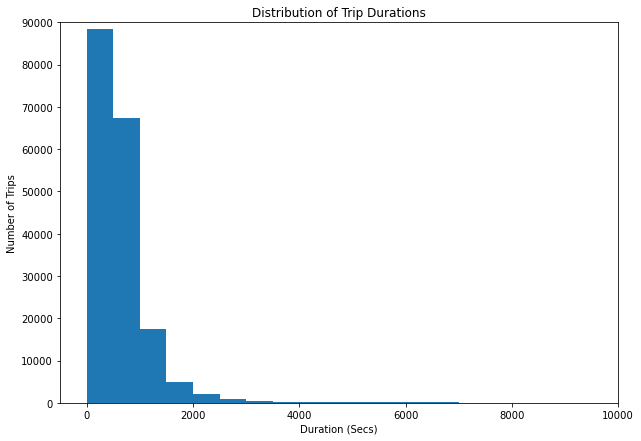

In [16]:
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[10, 7])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (Secs)')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

Trip durations have majority falling between 0 and 2000 seconds. To get more details, a log scale transformation will be done.

/var/folders/1l/vb42vw715ndd_r3d14zshrjr0000gn/T/ipykernel_48829/2511378949.py:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 15000])


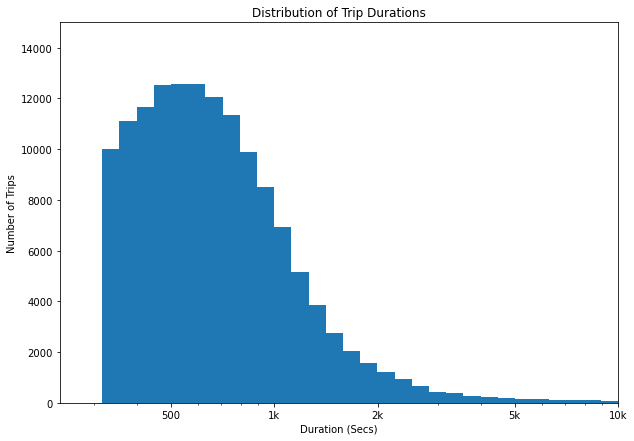

In [17]:
#getting more details from a log scale
log_binsize = 0.05
bins_log = 10 ** np.arange(2.5, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[10, 7])
plt.hist(data = df, x = 'duration_sec', bins = bins_log)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (Secs)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

Most trip durations fall between 0 and 2000 seconds. Peak of the distribution falls around 600 and 700 seconds.

In [18]:
# distribution of user types

def column (a, b, x, y, title, xlabel, ylabel):
    plt.figure(figsize=[a,b])
    plt.bar(x = x, height = y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt.show()

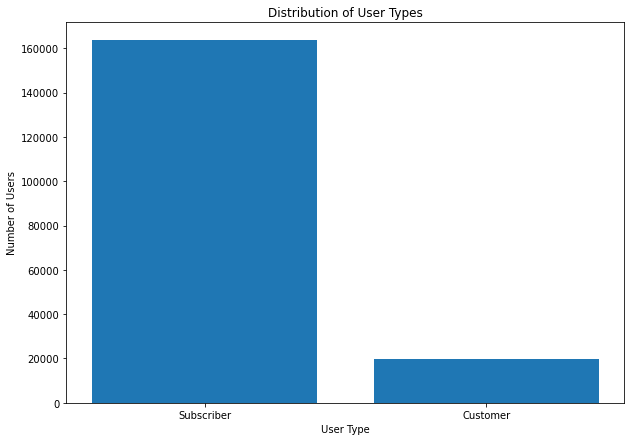

In [19]:
dist_user_types = column(10, 7, df.user_type.value_counts().keys(),  df.user_type.value_counts(), 'Distribution of User Types', 'User Type', 'Number of Users')

Subscribers make up the highest number of user types. To get the exact difference in percentage, a pie chart will be plotted below.

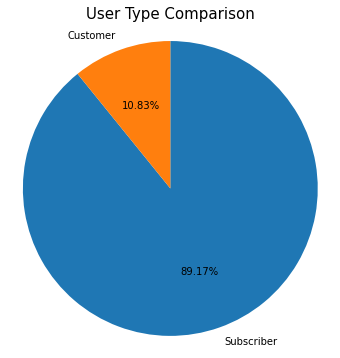

In [20]:
#by percentage
plt.figure(figsize=(10,6))
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('User Type Comparison', fontsize=15);

User type subscriber makes 89% of all users

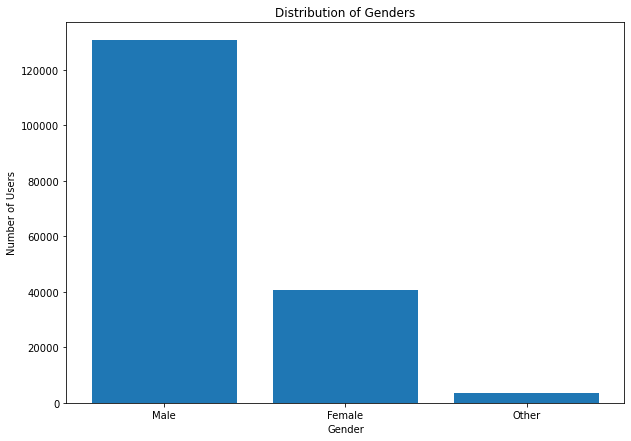

In [21]:
dist_genders = column(10, 7, df.member_gender.value_counts().keys(),  df.member_gender.value_counts(), 'Distribution of Genders', 'Gender', 'Number of Users')

Male is the most common gender of bike share users. More details will be gotten from the pie chart below.

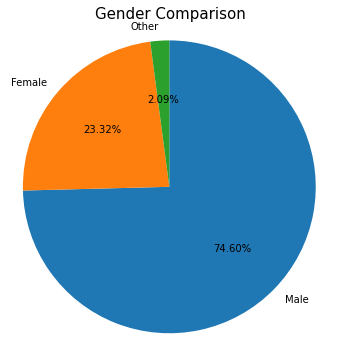

In [22]:
#by percentage
plt.figure(figsize=(10,6))
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Gender Comparison', fontsize=15);

Male is the most common gender making 74.60% of users, females make up 23.32% while other gender make up 2.09%

### Exploring by dates

In [23]:
df['hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day_name()
df['month'] = df['start_time'].dt.month_name()

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour,start_day,month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,23,Thursday,February


In [24]:
print(df['start_time'].min())
print(df['start_time'].max())
print(df['month'].value_counts())

2019-02-01 00:00:20.636000
2019-02-28 23:59:18.548000
February    183412
Name: month, dtype: int64


All bike rides were made in February 2019 (1st to 28th)

### By Weekday

In [25]:
df['start_day'].value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: start_day, dtype: int64

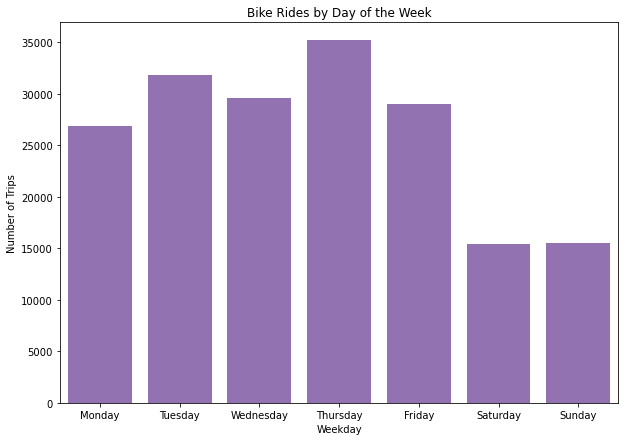

In [26]:
base_color = sns.color_palette()[4]

day_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize = (10,7))
plt.title('Bike Rides by Day of the Week')
sns.countplot(data = df, x = 'start_day', order = day_labels, color = base_color)
plt.xlabel('Weekday')
plt.ylabel('Number of Trips');

Thursday is the weekday with the highest number of trips. We see that weekdays generally have more trips than the weeekends.

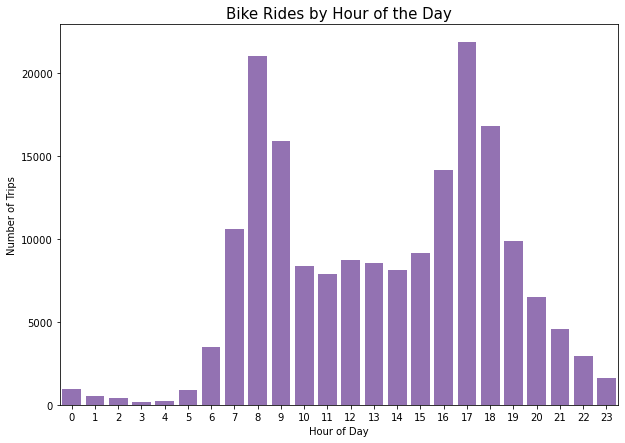

In [27]:
order_hour = np.arange(0,24)

plt.figure(figsize = (10,7))
plt.title('Bike Rides by Hour of the Day', fontsize=15)
ax = sns.countplot(data = df, x = 'hour', order = order_hour, color = base_color)
plt.ylabel('Number of Trips')
plt.xlabel('Hour of Day');

We see more rides occuring at typical peak hours (0800 hours and 1700 hours). Generally, most rides are taken between 0700 hours and 1900 hours.

### Exploring Station names

In [28]:
#start station names

def stat(name, a, b, d, yname, xlabel, ylabel, title):
    order_stat = df[name].value_counts().index[:10]
    plt.figure(figsize=[a,b])
    sns.countplot(data = d, y = yname, color = base_color, order = order_stat);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

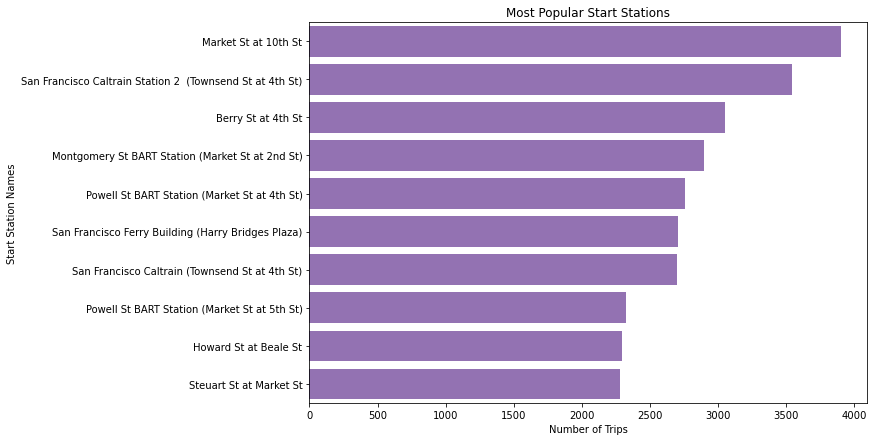

In [29]:
mst_pop_start = stat('start_station_name', 10, 7, df, 'start_station_name', 'Number of Trips', 'Start Station Names', 'Most Popular Start Stations' )

Market St at 10th St is the start station with the the highest number of trips.

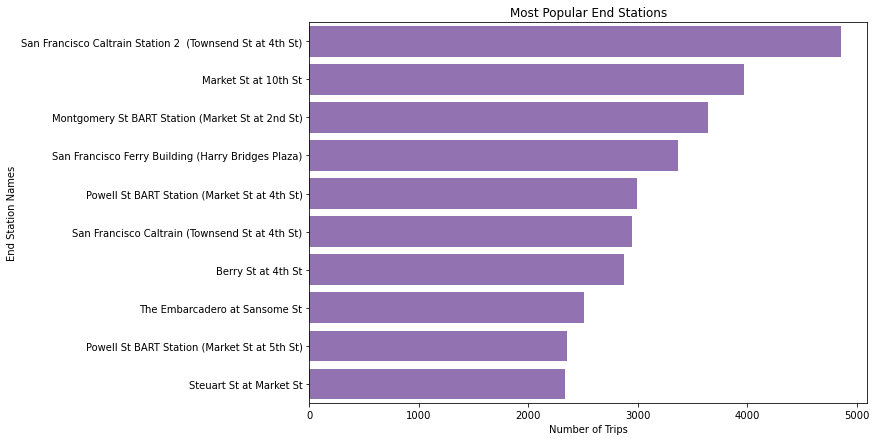

In [30]:
mst_pop_end = stat('end_station_name', 10, 7, df, 'end_station_name', 'Number of Trips', 'End Station Names', 'Most Popular End Stations' )

SanFrancisco Caltrain Station 2 (Townsend St at 4th St) is the end station with the highest number of trips.



#### Compare most popular station from both start and end stations

In [31]:
 start = df.start_station_name.value_counts(ascending=False).head(10)
end = df.end_station_name.value_counts(ascending=False).head(10)

# checking for popularity in both start and end stations
for s in start.index:
    if s in end:
        print(s)

Market St at 10th St
San Francisco Caltrain Station 2  (Townsend St at 4th St)
Berry St at 4th St
Montgomery St BART Station (Market St at 2nd St)
Powell St BART Station (Market St at 4th St)
San Francisco Ferry Building (Harry Bridges Plaza)
San Francisco Caltrain (Townsend St at 4th St)
Powell St BART Station (Market St at 5th St)
Steuart St at Market St


In [32]:
def stati(name, a, b, d, yname, xlabel, ylabel, title):
    order_stat = df[name].value_counts().index[-10:]
    plt.figure(figsize=[a,b])
    sns.countplot(data = d, y = yname, color = base_color, order = order_stat);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

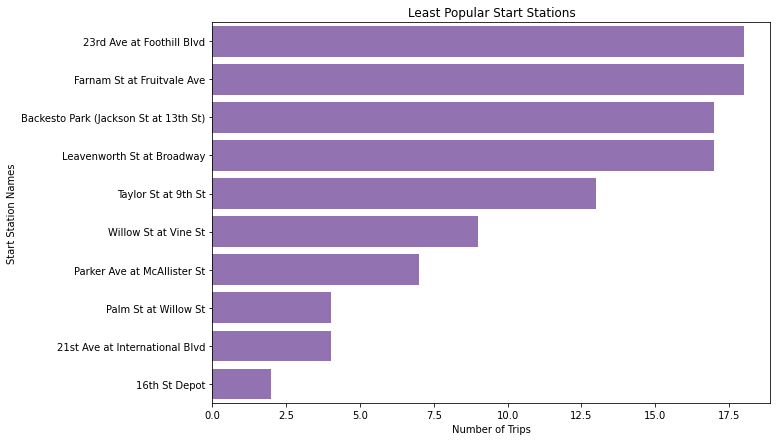

In [33]:
lst_pop_start = stati('start_station_name', 10, 7, df, 'start_station_name', 'Number of Trips', 'Start Station Names', 'Least Popular Start Stations' )

23rd Avenue at Foothill Blvd is the least popular start station

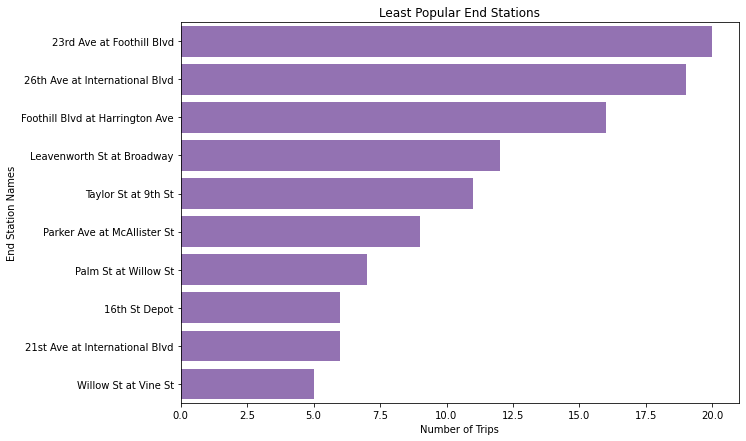

In [34]:
lst_pop_end = stati('end_station_name', 10, 7, df, 'end_station_name', 'Number of Trips', 'End Station Names', 'Least Popular End Stations' )

23rd Avenue at Foothill Blvd is also the least popular end station

#### Compare least popular stations from both start and end stations

In [35]:
start = df.start_station_name.value_counts(ascending=False).tail(10)
end = df.end_station_name.value_counts(ascending=False).tail(10)

# checking for popularity in both start and end stations
for s in start.index:
    if s in end:
        print(s)

23rd Ave at Foothill Blvd
Leavenworth St at Broadway
Taylor St at 9th St
Willow St at Vine St
Parker Ave at McAllister St
Palm St at Willow St
21st Ave at International Blvd
16th St Depot


In [36]:
# Age distribution from member's birth year.
df['member_age'] = 2019 - df['member_birth_year']

df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour,start_day,month,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,17,Thursday,February,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,18,Thursday,February,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,12,Thursday,February,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,17,Thursday,February,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,23,Thursday,February,45.0


In [37]:
df.member_age.min()

18.0

In [38]:
df.member_age.max()

141.0

In [39]:
df.member_age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

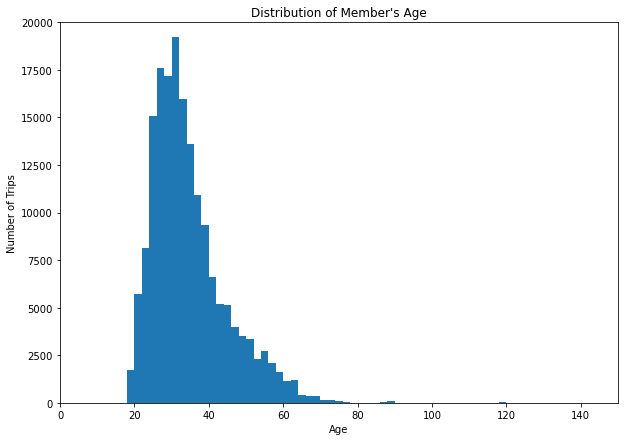

In [40]:
binsize = 2
bins = np.arange(0, df['member_age'].max()+binsize, binsize)

plt.figure(figsize=[10, 7])
plt.hist(data = df, x = 'member_age', bins = bins)
plt.title("Distribution of Member's Age")
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.axis([0, 150, 0, 20000])
plt.show()

Member's ages ranges between 18 and 140 years. Peak age of members is located at age 32 and most members fall between ages 18 and 60 years.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most trips fall between 0 and 2000 seconds. Peak point of trip was around 600 and 700 seconds. I transformes it to a log scale to get more granular details.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Before investigating, I had to fix some quality issues to ensure that all datatypes were in order. To explore dates and member's age, I had to derive some columns from the available columns in the dataset to get more infromation. 

## Bivariate Exploration

In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

### Duration and day of the week

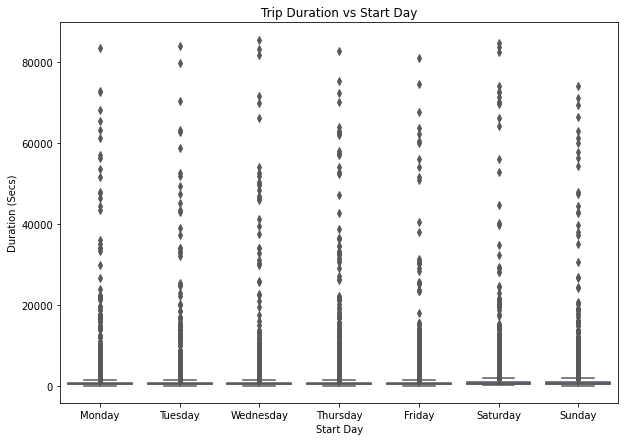

In [41]:
plt.figure(figsize = [10, 7])
sns.boxplot(data = df, x = 'start_day', y = 'duration_sec', color = base_color, order = day_labels)
plt.title('Trip Duration vs Start Day')
plt.xlabel('Start Day')
plt.ylabel('Duration (Secs)')
plt.show()

Returned plot has too many widespread values. To get more details, I'll limit the visualization to the concentration of values (0 - 2000 seconds)

### Duration and User Type

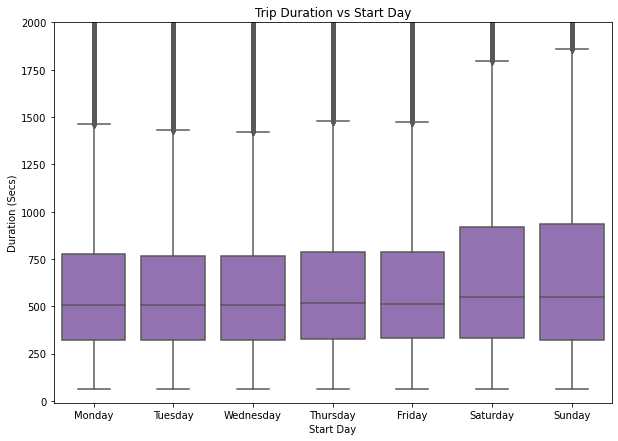

In [42]:
plt.figure(figsize = [10, 7])
sns.boxplot(data = df, x = 'start_day', y = 'duration_sec', color = base_color, order = day_labels)
plt.ylim([-10, 2000])
plt.title('Trip Duration vs Start Day')
plt.xlabel('Start Day')
plt.ylabel('Duration (Secs)')
plt.show()

Despite lesser rides on Saturdays and Sundays, we see higher trip durations on the weekends.

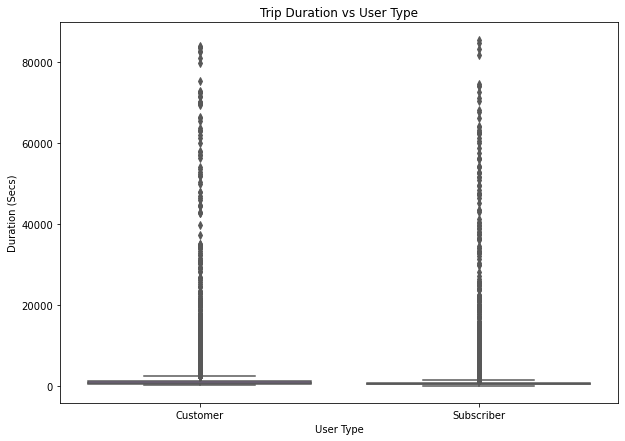

In [43]:
plt.figure(figsize = [10, 7])
sns.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.title('Trip Duration vs User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (Secs)')
plt.show()

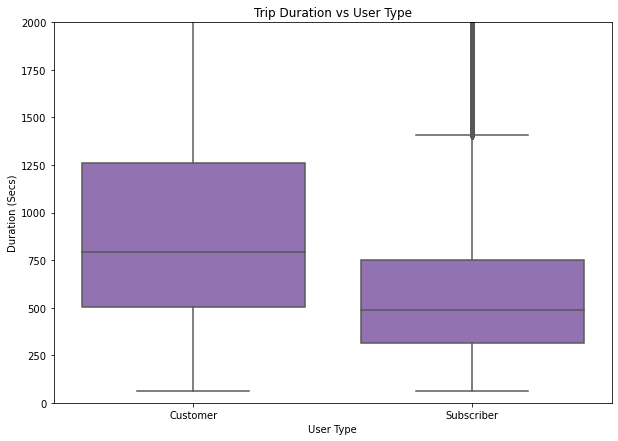

In [44]:
plt.figure(figsize = [10, 7])
sns.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([0, 2000])
plt.title('Trip Duration vs User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (Secs)')
plt.show()

Duration of customer's rides is generally higher than that of subscribers

### Duration and Gender

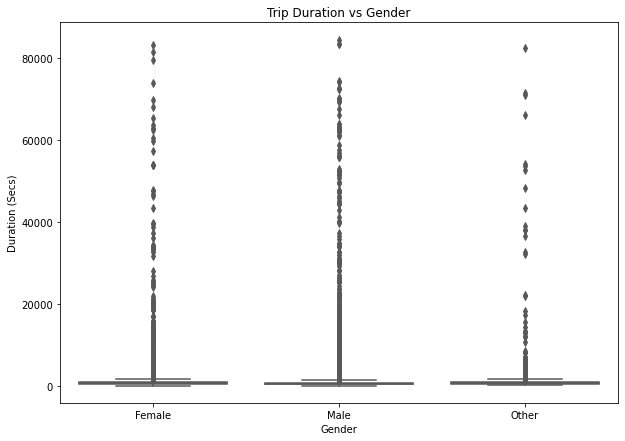

In [45]:
plt.figure(figsize = [10, 7])
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.title('Trip Duration vs Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (Secs)')
plt.show()

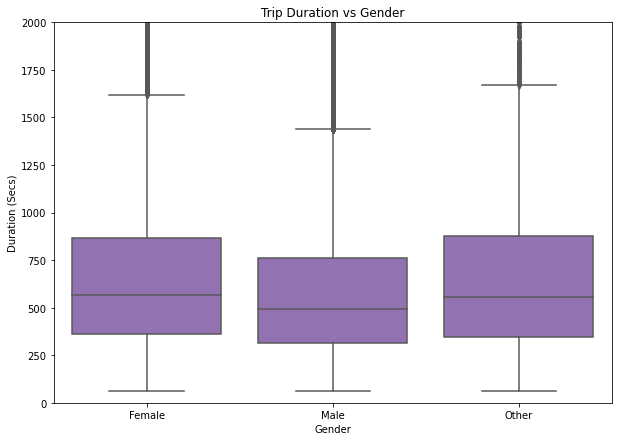

In [46]:
plt.figure(figsize = [10, 7])
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([0, 2000])
plt.title('Trip Duration vs Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (Secs)')
plt.show()

Female and other gender have higher duration times than male.

### Duration and Age

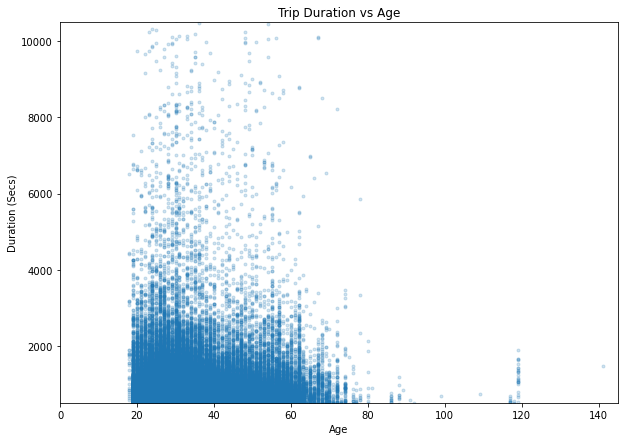

In [47]:
plt.figure(figsize=[10,7])
plt.scatter(df['member_age'], df['duration_sec'], alpha = 0.2, marker = '.' )
plt.axis([0, 145, 500, 10500])
plt.title('Trip Duration vs Age')
plt.xlabel('Age')
plt.ylabel('Duration (Secs)')
plt.show()

A large concentration of riders are aged between 18 and 70 years with most having trip duration between 0 and 2000 seconds. From the plot, we can see that as age increases more riders have less trip durations.

### Usage by User Type

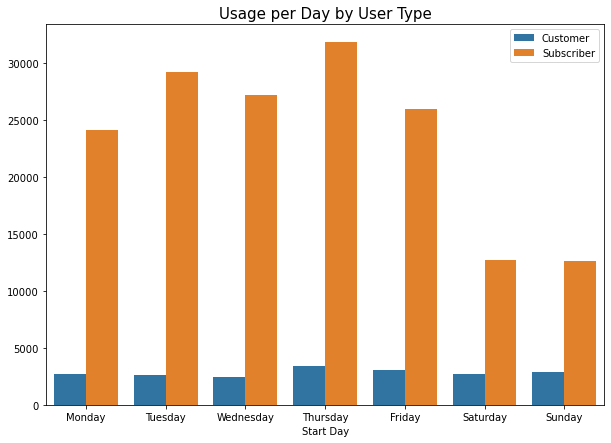

In [48]:
plt.figure(figsize=(10,7))
plt.title('Usage per Day by User Type', fontsize=15)
chart = sns.countplot(data=df, x='start_day', order=day_labels, hue='user_type')

chart.set(xlabel='Start Day', ylabel = '')

# Remove title of legend
plt.gca().legend().set_title('');

Both customers and subscribers have highest number of rides on Thursday. For suscribers, less rides are taken during the weekend.

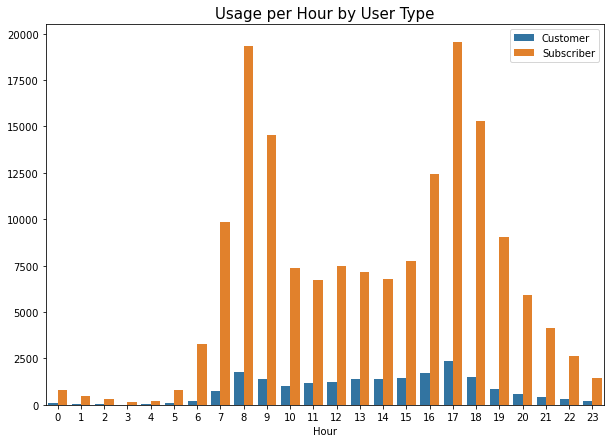

In [49]:
plt.figure(figsize=(10,7))
plt.title('Usage per Hour by User Type', fontsize=15)
chart = sns.countplot(data=df, x='hour', order = order_hour, hue='user_type')

chart.set(xlabel='Hour', ylabel = '')

# Remove title of legend
plt.gca().legend().set_title('');

Both customers and subscribers have their highest number of rides at peak hours

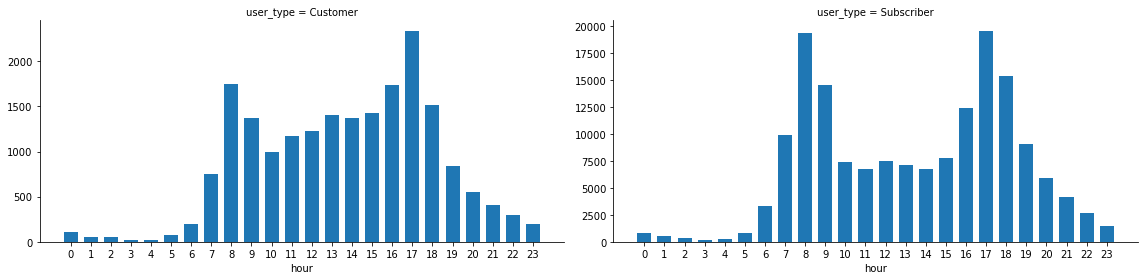

In [50]:
# facetting histograms of start_hour against user_type
bin_edges = np.arange(-0.5, 23.5+1, 1)
g = sns.FacetGrid(data = df, col = 'user_type', height=4, aspect=2, sharey=False)
g.map(plt.hist, "hour", bins = bin_edges, rwidth = 0.7);
plt.xticks(np.arange(0, 23+1, 1));

Facetting was sone to further break down customers and subsribers and same results were observed.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Trip duration and age have a negative relationship. Males tend to have less trip duration than females and others, subscribers tend to have less duration than customers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
It was interesting to see that Saturday and Sunday had the highest trip durations across week days despite being the days with the least number of trips.

### Multivariate Exploration

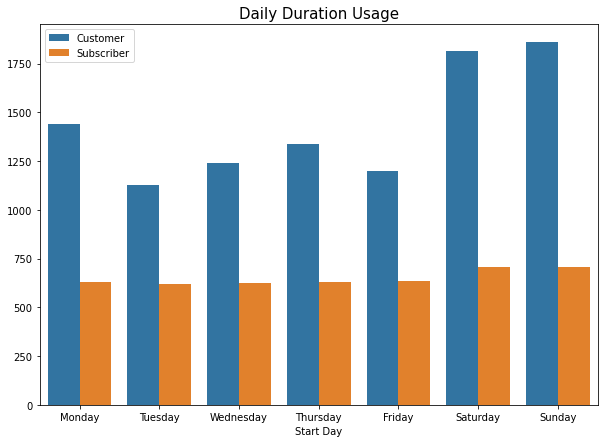

In [51]:
plt.figure(figsize=(10,7))
plt.title('Daily Duration Usage', fontsize=15)
chart = sns.barplot(data=df, x='start_day', y='duration_sec', order=day_labels, hue='user_type', ci=None)

chart.set(xlabel='Start Day', ylabel='')

# Remove legend title
plt.gca().legend().set_title('');

Customers used this service on weekdays and weekends for longer durations. We see an almost steady pattern in duration for subscribers. This is interesting seeing as we have more subscribers than customers.

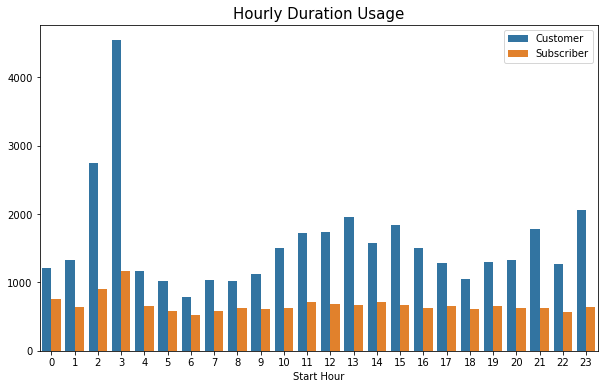

In [52]:
plt.figure(figsize=(10,6))
plt.title('Hourly Duration Usage', fontsize=15)
chart = sns.barplot(data=df, x='hour', y='duration_sec', hue='user_type', ci=None)

chart.set(xlabel='Start Hour', ylabel='')

# Remove legend title
plt.gca().legend().set_title('');

Per hours, subscribers also generally have a longer duration. It's quite interesting however that 2am and 3am have the highest duration times for both customers and subscribers.

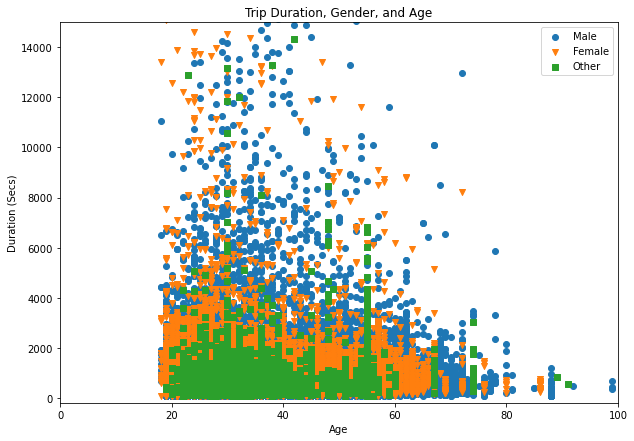

In [53]:
shapes = [['Male', 'o'],['Female', 'v'],['Other', 's']]
plt.figure(figsize=(10,7))
for gender, shape in shapes:
    df_gender = df[df['member_gender'] == gender]
    plt.scatter(df_gender['member_age'], df_gender['duration_sec'], marker = shape, alpha= 1)
plt.legend(['Male','Female','Other'])
plt.axis([0, 100, -200, 15000 ])
plt.title('Trip Duration, Gender, and Age')
plt.xlabel('Age')
plt.ylabel('Duration (Secs)')
plt.show()

All three genders show similar relationship per age and duration